In [2]:
#coding=utf-8
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
f = pd.read_csv('../winemag-data-130k-v2.csv')
print(f.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


## 1.标称属性列

观察数据可知标称属性列有：`country`,`description`,`designation`,`province`,`region_1`,`region_2`,`taster_name`,`taster_twitter_handle`,`title`,`variety`, `winery`，打印其每列每一可能取值的频数

In [11]:
for x in ['country', 'description','designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']:
    print('%s:' % x)
    print(f[x].value_counts())
    print()


country:
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

taster_twitter_handle:
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_h

## 2.数值属性列
### 2.1 摘要
数值属性列有 `points`,`price`, 打印出最大、最小、均值、中位数、四分位数及缺失值个数

In [13]:
for x in ['points', 'price']:
    print('%s列' % x)
    print('最大值:%s' % f[x].max(), '最小值:%s' % f[x].min(), '平均值:%s' % f[x].mean(),
          '下四分位数:%s' % f[x].quantile(0.25), '中位数:%s' % f[x].quantile(0.5), '上四分位数:%s' % f[x].quantile(0.75), '缺失值个数:%s' % f[x].isnull().sum())

points列
最大值:100 最小值:80 平均值:88.44713820775404 下四分位数:86.0 中位数:88.0 上四分位数:91.0 缺失值个数:0
price列
最大值:3300.0 最小值:4.0 平均值:35.363389129985535 下四分位数:17.0 中位数:25.0 上四分位数:42.0 缺失值个数:8996


### 2.2 数值属性列可视化

### 2.2.1 `points` 可视化

`points` 直方图如下图所示：

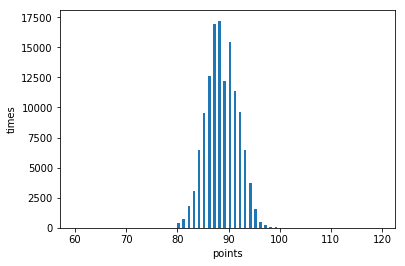

In [18]:
df = f.points.sort_values(ascending=False)
binsVal = np.arange(60, 120, 0.5)
plt.hist(df, bins=binsVal)
plt.xlabel('points')
plt.ylabel('times')
plt.show()

qq图如下所示：

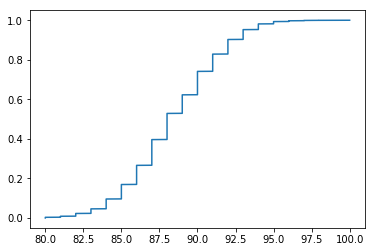

In [19]:
points = f['points']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

标准正太分布图如下所示(只在此处打印，此后不再重复)，`points`不符合正太分布：


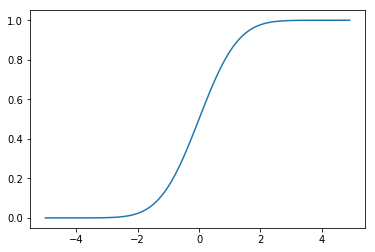

In [21]:
from scipy import stats
x = np.arange(-5, 5, 0.1)
y = stats.norm.cdf(x, 0, 1)
plt.plot(x, y)

盒图如下图所示，有高于上线的离群点

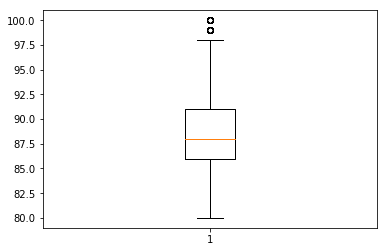

In [37]:
fig, ax = plt.subplots()
ax.boxplot(f['points'])
plt.show()

### 2.2.2 price 可视化

直方图如下图所示：


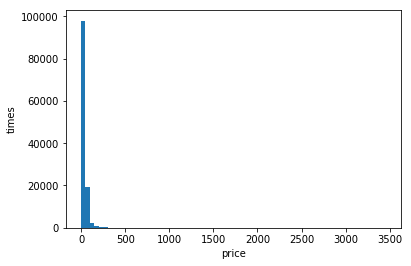

In [32]:
df = f.price.sort_values(ascending=False)
binsVal = np.arange(0, 3500, 50)
plt.hist(df, bins=binsVal)
plt.xlabel('price')
plt.ylabel('times')
plt.show()

qq图如下图所示，不符合正太分布

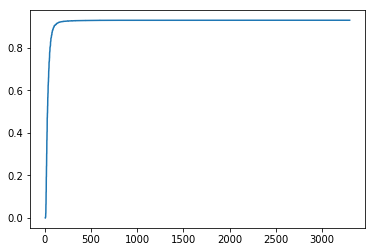

In [33]:
points = f['price']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

盒图如下图所示：由统计的 `price` 最大值为3300，最小值为4，平均值为35可知，会有大量异常值

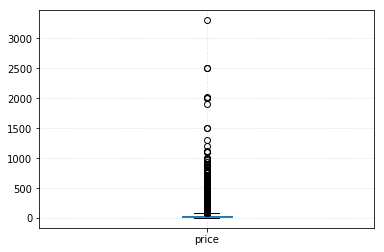

In [40]:
df = pd.DataFrame(f['price'])
df.plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

## 3 缺失值处理

首先查看各列有多少缺失值

In [41]:
for x in f.columns:
    print("%s有%s个缺失值" % (x, f[x].isnull().sum()))

Unnamed: 0有0个缺失值
country有63个缺失值
description有0个缺失值
designation有37465个缺失值
points有0个缺失值
price有8996个缺失值
province有63个缺失值
region_1有21247个缺失值
region_2有79460个缺失值
taster_name有26244个缺失值
taster_twitter_handle有31213个缺失值
title有0个缺失值
variety有1个缺失值
winery有0个缺失值


该数据集旨在使用描述/评论中的单词推测酒的种类，其中缺失值出现的原因可能是不清楚该酒的信息。比如酒价格缺失，可能是酒已经停止售卖了，酒产地缺失可能是根本不知道酒产地在哪。

### 3.1 删除缺失值,并对数值列可视化

In [43]:
f = f.dropna(how='any')

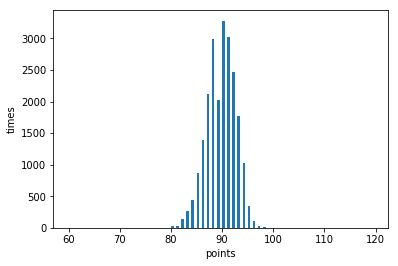

In [44]:
df = f.points.sort_values(ascending=False)
binsVal = np.arange(60, 120, 0.5)
plt.hist(df, bins=binsVal)
plt.xlabel('points')
plt.ylabel('times')
plt.show()

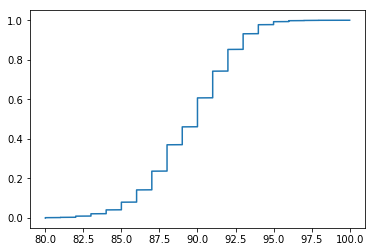

In [45]:
points = f['points']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

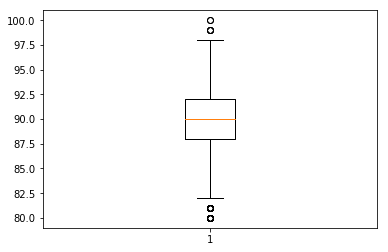

In [46]:
fig, ax = plt.subplots()
ax.boxplot(f['points'])
plt.show()

### 对比发现， points删除后的qq图局部更陡，且其盒图中出现了低于下限的离群点

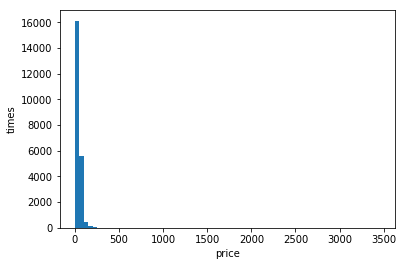

In [47]:
df = f.price.sort_values(ascending=False)
binsVal = np.arange(0, 3500, 50)
plt.hist(df, bins=binsVal)
plt.xlabel('price')
plt.ylabel('times')
plt.show()

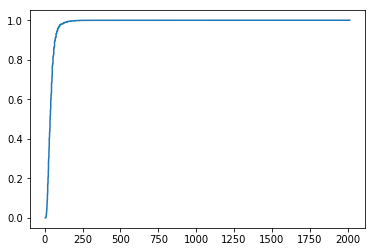

In [48]:
points = f['price']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

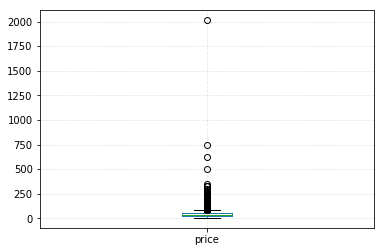

In [49]:
df = pd.DataFrame(f['price'])
df.plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

### price删除后差别不大

### 3.2 用最高频率值来填补缺失值，并对数值列可视化

In [95]:
# 上一步将缺失值删除了 需要重新读入数据
f = pd.read_csv('../winemag-data-130k-v2.csv')
for c in f.columns[1:]:
    if f[c].isnull().any:
        most_appear = f[c].value_counts().index[0]
        f[c].fillna(most_appear)
        
    

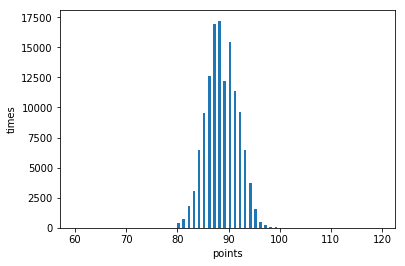

In [96]:
df = f.points.sort_values(ascending=False)
binsVal = np.arange(60, 120, 0.5)
plt.hist(df, bins=binsVal)
plt.xlabel('points')
plt.ylabel('times')
plt.show()

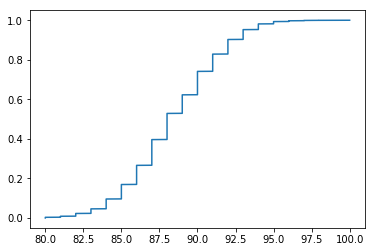

In [97]:
points = f['points']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

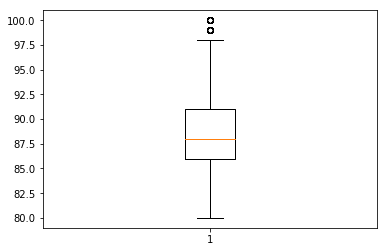

In [98]:
fig, ax = plt.subplots()
ax.boxplot(f['points'])
plt.show()

**处理后与处理前差别不大**

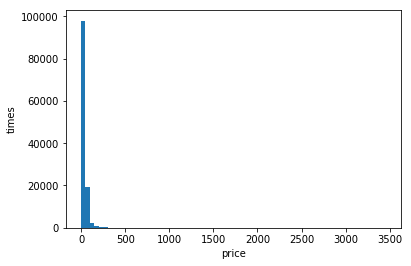

In [100]:
df = f.price.sort_values(ascending=False)
binsVal = np.arange(0, 3500, 50)
plt.hist(df, bins=binsVal)
plt.xlabel('price')
plt.ylabel('times')
plt.show()

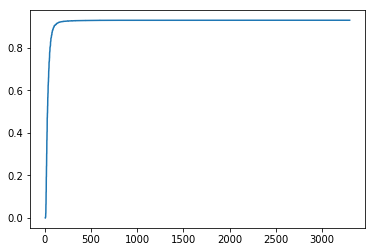

In [101]:
points = f['price']
sorted_ = np.sort(points)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

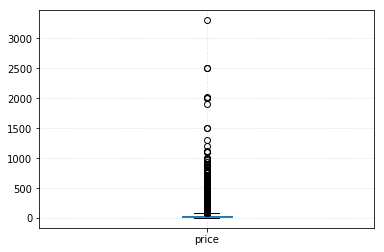

In [102]:
df = pd.DataFrame(f['price'])
df.plot.box()
plt.grid(linestyle="--", alpha=0.3)
plt.show()

**处理后与处理前差别不大**

### 3.3通过属性的相关关系来填补缺失值

### 3.3通过数据对象之间的相似性来填补缺失值